In [1]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras
import os
from IPython.display import clear_output

In [2]:
# Helper libraries
import numpy as np
import random
%matplotlib inline
import matplotlib
# matplotlib.use('TkAgg')# Backend needed for the Mac virtual env
import matplotlib.pyplot as plt

In [3]:
# Set seeds for reproducibilty
def seed_random_number(seed):
    # see https://stackoverflow.com/a/52897216
    np.random.seed(seed)
    tf.set_random_seed(seed)
    os.environ['PYTHONHASHSEED']=str(seed)
    random.seed(seed)

random_seed = 1
seed_random_number(random_seed)

#####################
# from keras import backend as K
# # see https://stackoverflow.com/a/52897216 we really need singlethread to get
# # reproducible results!
# session_conf = tensorflow.ConfigProto(intra_op_parallelism_threads=1, inter_op_parallelism_threads=1)
# sess = tensorflow.Session(graph=tensorflow.get_default_graph(), config=session_conf)
# K.set_session(sess)

In [4]:
# Data set:
# BnW 28x28 pixel handwritten images of digits
# 60000 training samples, 10000 test samples

# Importing data from MNIST server
# mnist = keras.datasets.mnist
# (train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Import data locally
train_images = np.load('Data/train_data.npy')
train_labels = np.load('Data/train_data_label.npy')
test_images  = np.load('Data/test_data.npy')
test_labels  = np.load('Data/test_data_labels.npy')
print(train_images.shape)

(60000, 28, 28)


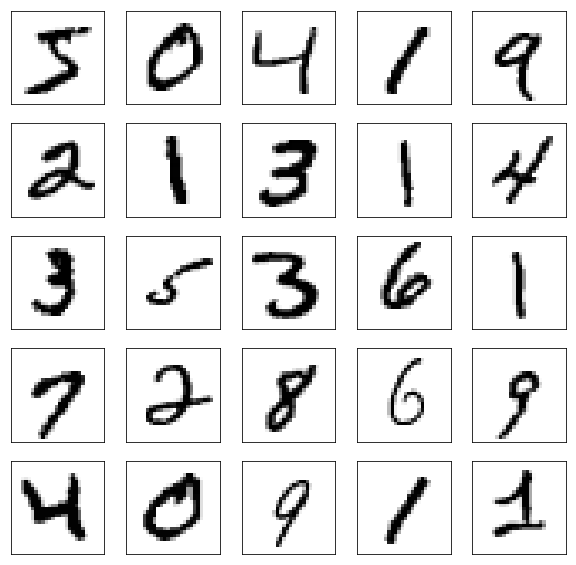

In [5]:
# Visualize a few of the images
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
plt.show()    

In [5]:
# Function describing network architecture
def create_model():
  model = keras.Sequential([
          keras.layers.Flatten(input_shape=(28, 28)),
          keras.layers.Dense(10, activation=tf.nn.relu, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(10, activation=tf.nn.relu, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(10, activation=tf.nn.relu, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal'),
          keras.layers.Dense(10, activation=tf.nn.softmax, use_bias=True, kernel_initializer='RandomNormal', bias_initializer='RandomNormal')
  ])
  
  model.compile(optimizer=tf.train.AdamOptimizer(), 
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  
  return model

model = create_model()
model.summary()
#model.get_weights()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                110       
_________________________________________________________________
dense_3 (Dense)              (None, 10)                110       
Total params: 8,180
Trainable params: 8,180
Non-trainable params: 0
_________________________________________________________________


In [7]:
# Training
# model.fit(train_images, train_labels, epochs=10, verbose=1, batch_size=32)
model.fit(train_images, 
          train_labels, 
          epochs=10, 
          verbose=2, 
          batch_size=32, 
          shuffle=True, 
          validation_split=0.2,
          initial_epoch=0
          )

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
 - 2s - loss: 0.5275 - acc: 0.8324 - val_loss: 0.2841 - val_acc: 0.9171
Epoch 2/10
 - 2s - loss: 0.2848 - acc: 0.9169 - val_loss: 0.2658 - val_acc: 0.9236
Epoch 3/10
 - 2s - loss: 0.2521 - acc: 0.9258 - val_loss: 0.2223 - val_acc: 0.9367
Epoch 4/10
 - 2s - loss: 0.2321 - acc: 0.9320 - val_loss: 0.2456 - val_acc: 0.9296
Epoch 5/10
 - 2s - loss: 0.2226 - acc: 0.9350 - val_loss: 0.2466 - val_acc: 0.9306
Epoch 6/10
 - 2s - loss: 0.2176 - acc: 0.9365 - val_loss: 0.2361 - val_acc: 0.9337
Epoch 7/10
 - 2s - loss: 0.2084 - acc: 0.9386 - val_loss: 0.2244 - val_acc: 0.9360
Epoch 8/10
 - 2s - loss: 0.2014 - acc: 0.9407 - val_loss: 0.2343 - val_acc: 0.9326
Epoch 9/10
 - 2s - loss: 0.1972 - acc: 0.9424 - val_loss: 0.2627 - val_acc: 0.9282
Epoch 10/10
 - 2s - loss: 0.1948 - acc: 0.9432 - val_loss: 0.2283 - val_acc: 0.9369


In [11]:
# Test accuracy of trained model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

10000/10000 [==============================] - 0s 18us/step
('Test accuracy:', 0.9282)


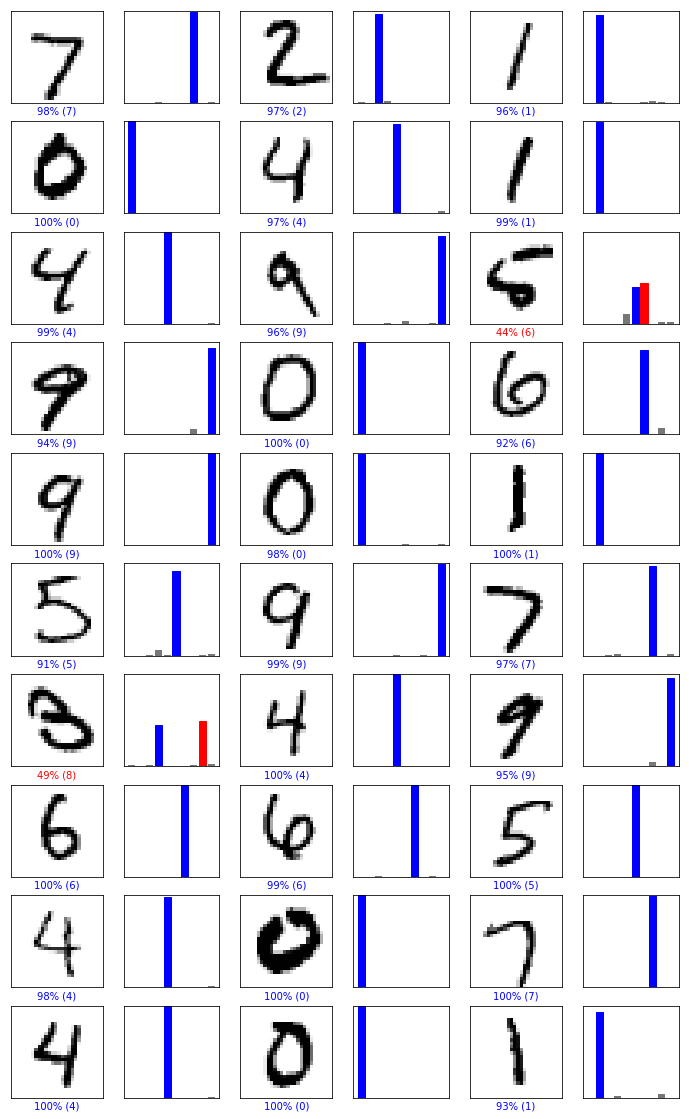

In [8]:
# Making predictions

def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  
  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'
  
  plt.xlabel("{:2.0f}% ({})".format(100*np.max(predictions_array),
                                    predicted_label),
                                    color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1]) 
  predicted_label = np.argmax(predictions_array)
 
  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


predictions = model.predict(test_images)  
# Plot the first X test images, their predicted label, and the true label
# Color correct predictions in blue, incorrect predictions in red
num_rows = 10
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)